In [47]:
import pandas as pd

file_path = "raw_data.csv"

# تحميل البيانات
df = pd.read_csv("raw_data.csv")

In [3]:
missing_values = df.isnull().sum()
print(missing_values)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
df.dropna(inplace=True)


In [7]:
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']

scaler = MinMaxScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,0.292453,0.196347,0,1.0,0.740458,0,0.161290,2,2,3,0
1,53,1,0,0.433962,0.175799,1,0.0,0.641221,1,0.500000,0,0,3,0
2,70,1,0,0.481132,0.109589,0,1.0,0.412214,1,0.419355,0,0,3,0
3,61,1,0,0.509434,0.175799,0,1.0,0.687023,0,0.000000,2,1,3,0
4,62,0,0,0.415094,0.383562,1,1.0,0.267176,0,0.306452,1,3,2,0


In [11]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['cp', 'restecg', 'slope', 'thal']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1.0,restecg_2.0,slope_1,slope_2,thal_1,thal_2,thal_3
0,52,1,0.292453,0.196347,0,0.740458,0,0.161290,2,0,False,False,False,True,False,False,True,False,False,True
1,53,1,0.433962,0.175799,1,0.641221,1,0.500000,0,0,False,False,False,False,False,False,False,False,False,True
2,70,1,0.481132,0.109589,0,0.412214,1,0.419355,0,0,False,False,False,True,False,False,False,False,False,True
3,61,1,0.509434,0.175799,0,0.687023,0,0.000000,1,0,False,False,False,True,False,False,True,False,False,True
4,62,0,0.415094,0.383562,1,0.267176,0,0.306452,3,0,False,False,False,True,False,True,False,False,True,False


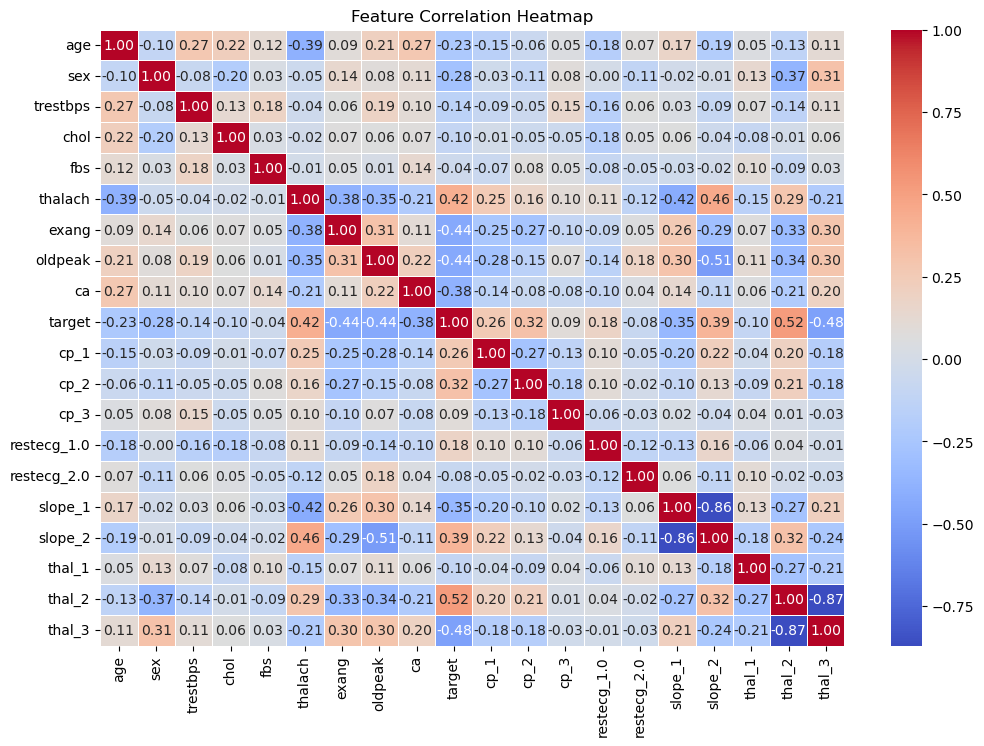

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
correlation_with_target = corr_matrix['target'].abs().sort_values(ascending=False)

print(correlation_with_target)


target         1.000000
thal_2         0.523961
thal_3         0.481761
exang          0.437950
oldpeak        0.437571
thalach        0.423188
slope_2        0.389233
ca             0.380889
slope_1        0.349395
cp_2           0.319507
sex            0.279398
cp_1           0.255276
age            0.229106
restecg_1.0    0.178149
trestbps       0.139704
thal_1         0.100632
chol           0.099351
cp_3           0.089234
restecg_2.0    0.076601
fbs            0.038965
Name: target, dtype: float64


In [17]:
selected_features = ['cp_1', 'thal_3', 'oldpeak', 'exang', 'thalach', 'slope_2']

df_selected = df[selected_features + ['target']]

df_selected.head()


,cp_1,thal_3,oldpeak,exang,thalach,slope_2,target
0,False,True,0.161290,0,0.740458,True,0
1,False,True,0.500000,1,0.641221,False,0
2,False,True,0.419355,1,0.412214,False,0
3,False,True,0.000000,0,0.687023,True,0
4,False,False,0.306452,0,0.267176,False,0


In [19]:
df_selected.to_csv("cleaned_data.csv", index=False)


In [21]:
import pandas as pd  
print(df_selected.describe())

           oldpeak        exang      thalach       target
count  1022.000000  1022.000000  1022.000000  1022.000000
mean      0.172669     0.336595     0.596368     0.513699
std       0.189615     0.472776     0.175867     0.500057
min       0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.465649     0.000000
50%       0.129032     0.000000     0.618321     1.000000
75%       0.290323     1.000000     0.725191     1.000000
max       1.000000     1.000000     1.000000     1.000000


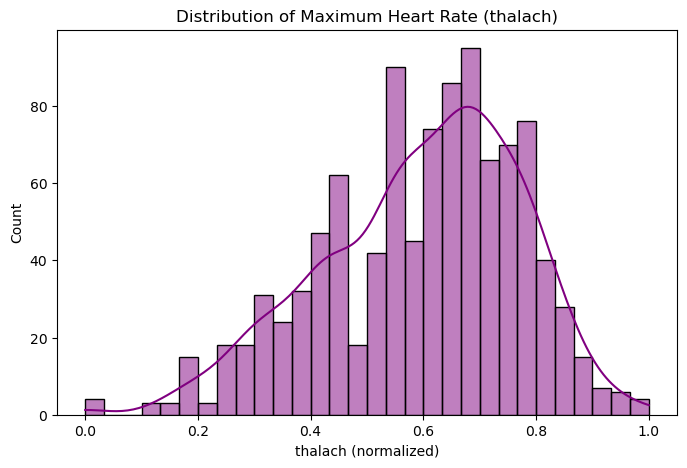

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_selected["thalach"], kde=True, bins=30, color="purple")
plt.title("Distribution of Maximum Heart Rate (thalach)")
plt.xlabel("thalach (normalized)")
plt.ylabel("Count")
plt.show()


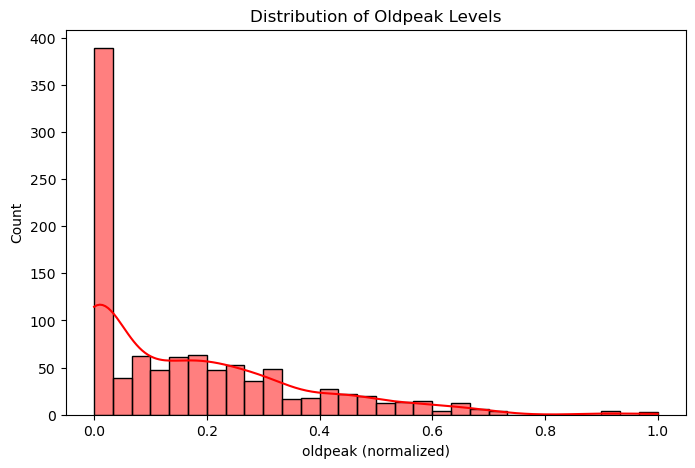

In [33]:

plt.figure(figsize=(8, 5))
sns.histplot(df_selected["oldpeak"], kde=True, bins=30, color="red")
plt.title("Distribution of Oldpeak Levels")
plt.xlabel("oldpeak (normalized)")
plt.ylabel("Count")
plt.show()


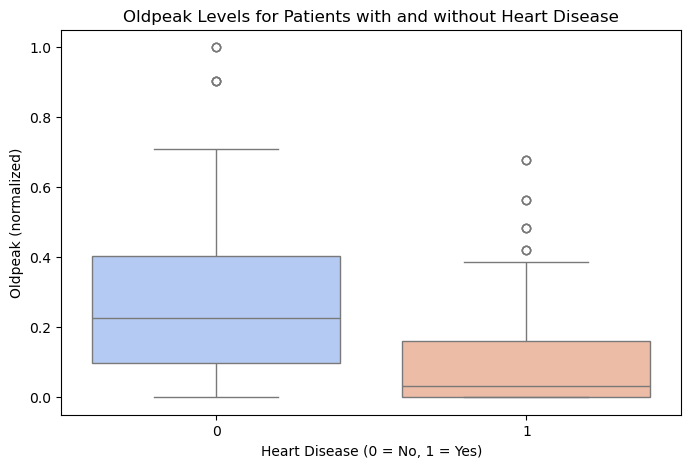

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="target", y="oldpeak", data=df_selected, hue="target", palette="coolwarm", legend=False)
plt.title("Oldpeak Levels for Patients with and without Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Oldpeak (normalized)")
plt.show()

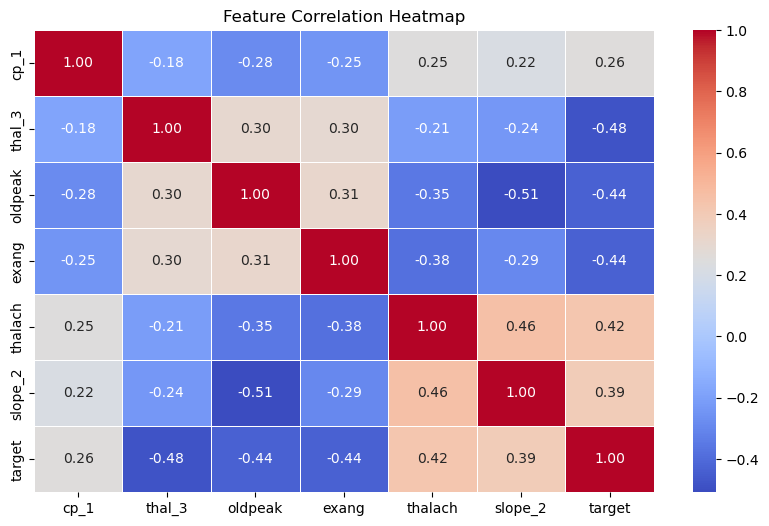

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_selected.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

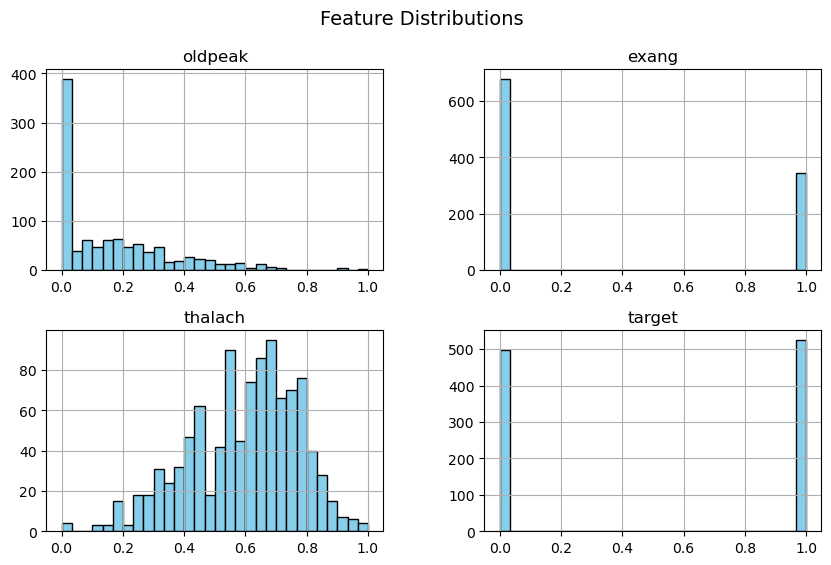

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# رسم التوزيعات باستخدام الهستوجرام
df_selected .hist(figsize=(10, 6), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


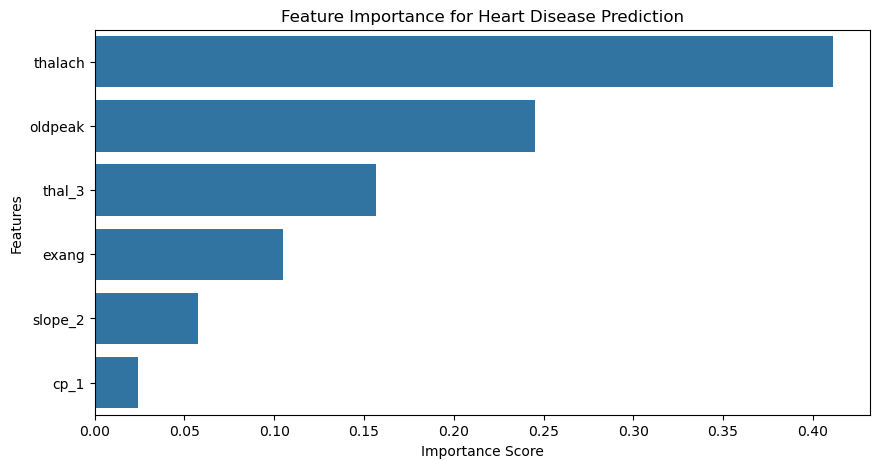

In [45]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = df_selected.drop(columns=['target'])  # الميزات المستقلة
y = df_selected['target']  # المتغير المستهدف

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance for Heart Disease Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [53]:
# إضافة الأعمدة الأصلية age و sex مع الأعمدة التي تم تحديدها
selected_features_with_age_sex = ['cp', 'thal', 'slope', 'oldpeak', 'exang', 'thalach'] 

# إنشاء DataFrame جديد يحتوي على الأعمدة المحددة بما في ذلك target و age و sex
df_selected = df[selected_features_with_age_sex + ['target', 'age', 'sex']]

# عرض أول 5 صفوف
df_selected.head()

# تصدير البيانات إلى ملف CSV
df_selected.to_csv("cleaned_data_with_age_sex.csv", index=False)
